Рекомендательные системы — программы, которые пытаются предсказать, какие объекты (фильмы, музыка, книги, новости, веб-сайты) будут интересны пользователю, имея определенную информацию о его профиле.


Можно выделить три основных типа рекомендательных систем.

- Content-based

Пользователю рекомендуются фильмы, похожие на те, которые он уже посмотрел.
Похожести оцениваются по признакам содержимого объектов.
Сильная зависимость от предметной области, полезность рекомендаций ограничена.

- Коллаборативная фильтрация (Collaborative Filtering)

Для рекомендации используется история оценок как самого пользователя, так и других пользователей.
Более универсальный подход, часто дает лучший результат.
В большинстве случаев алгоритмы коллаборативной фильтрации (CF) показывают лучший результат, чем content-based системы. 

- Гибридные 

1.
Наивная рекомендация - основывается на том, что считается средняя оценка всех пользователей для объекта  
по которому надо сделать рекомендацию и осуществляется поиск всех объектов с рейтингом больше полученного.Относится к Content-Based.

In [7]:
import numpy as np
import pandas as pd 

#Считываем датасет
ratings_data = pd.read_csv("ratings.csv")
ratings_data.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
#Считываем другой датасет
movie_names = pd.read_csv("movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
#Так как нас интересует рейтинг, объединяем два датасета
movie_data = pd.merge(ratings_data, movie_names, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [20]:
#Групируем фильмы по названию, вычисляем среднее значение рейтинга, сортируем по убыванию 
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [7]:
#Группируем по названию и высчитываем количество рейтингов
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [8]:
#Добавляем среднюю оценку и количество рейтингов в датафрейм
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [9]:
#Cоставляем сводную таблицу, пользователи фильмы с оценками фильмам
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Выбираем фильм из таблицы и ищем кореляцию
current_film_ratings = user_movie_rating['Forrest Gump (1994)']
movies_like_current_film = user_movie_rating.corrwith(current_film_ratings)
#Создаем датафрейм с результатом и подгатавливаем данные
corr_current_film = pd.DataFrame(movies_like_current_film, columns=['Correlation'])
corr_current_film.dropna(inplace=True)
corr_current_film.sort_values('Correlation', ascending=False).head()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0


In [11]:
corr_current_film = corr_current_film.join(ratings_mean_count['rating_counts'])
corr_current_film.head()


,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [12]:
#Выбираем фильмы только те, кол-во рейтингов у которых больше 50
corr_current_film[corr_current_film ['rating_counts']>50].sort_values('Correlation', ascending=False).head()


,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52


Данная рекомендательная система очень простая и очень неточная, ее можно еще улучшить например выбирать только те фильмы жанр которых совпадает с исходным.
Плюсы:
    - Простая 
    - Не требует большого времени работы
Минусы:
    - Холодный старт 
    - Неточность 

2.
Рекомендательная система на основе колаборативной фильтрации .

In [2]:
import numpy as np
import pandas as pd 

# Вспоминаем данные 
ratings_data = pd.read_csv("ratings.csv")
ratings_data.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [4]:
# чтобы можно было удобно работать дальше, необходимо отмасштабировать 
# значения в колонке movieId (новые значения будут в диапазоне от 1 до
# количества фильмов)
input_list = ratings_data['movieId'].unique()

def scale_movie_id(input_id):
    return np.where(input_list == input_id)[0][0] + 1

ratings_data['movieId'] = ratings_data['movieId'].apply(scale_movie_id)

from sklearn import model_selection as ms

# делим данные на тренировочный и тестовый наборы
train_data, test_data = ms.train_test_split(ratings_data, test_size=0.20)



Memory-Based Collaborative Filtering

Memory-Based Collaborative Filtering подходы можно разделить на две части: user-item filtering and item-item filtering.

В user-item filtering мы:

Берём исходного пользователя
Находим группу пользователей, которая максимально похожа на него (основываясь, например, оценках) и узнаём, какие фильмы понравились этой группе.
Нашему исходному пользователю рекомендуем фильмы, которые нравятся найденной группе пользователей.
На входе пользователь, на выходе – рекомендация фильмов для данного пользователя.

В item-item filtering мы:

Берём какой-либо фильм
Находим пользователей, которым нравится этот фильм
Смотрим на фильмы, которые нравятся найденным пользователям и выводим их в качестве рекомендации к исходному товару
На входе фильм, на выходе – рекомендация в виде похожих фильмов.

Item-Item Collaborative Filtering: "Пользователям, которым нравится данный фильм, может так же понравиться это ..."
User-Item Collaborative Filtering: "Похожим на вас пользователям нравится это ..."

В обоих случаях нам необходимо создать user-item матрицу, в которой в ячейках матрицы будет записана информация об оценке фильма m пользователя n.

In [6]:
n_users = ratings_data['userId'].unique().shape[0]
n_items = ratings_data['movieId'].unique().shape[0]

# создаём две user-item матрицы – для обучения и для теста
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1] - 1, line[2] - 1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1] - 1, line[2] - 1] = line[3]
    

После того, как мы построим данную матрицу, на её основе необходимо будет рассчитать две новые матрицы с коэффициентами сходства (похожести, близости) для пользователей и для фильмов.

В качестве метрики близости в данной работе используется косинусное расстояние между векторами пользователей (фильмов).

In [8]:
from sklearn.metrics.pairwise import pairwise_distances

# считаем косинусное расстояние для пользователей и фильмов
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

print(user_similarity)

print(item_similarity)

[[0.         0.98166154 0.93855765 ... 0.77511054 0.94051254 0.88473296]
 [0.98166154 0.         1.         ... 0.97794358 0.96241042 0.89679751]
 [0.93855765 1.         0.         ... 0.97981063 1.         0.97087973]
 ...
 [0.77511054 0.97794358 0.97981063 ... 0.         0.92937213 0.74026951]
 [0.94051254 0.96241042 1.         ... 0.92937213 0.         0.97563502]
 [0.88473296 0.89679751 0.97087973 ... 0.74026951 0.97563502 0.        ]]
[[0.         0.78464927 0.72916802 ... 1.         0.9036768  1.        ]
 [0.78464927 0.         0.75139755 ... 1.         1.         1.        ]
 [0.72916802 0.75139755 0.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.         1.         1.        ]
 [0.9036768  1.         1.         ... 1.         0.         1.        ]
 [1.         1.         1.         ... 1.         1.         0.        ]]


Для предсказания в user-based CF и item-based CF необходимо применить следующие формулы:
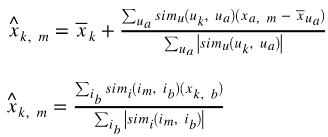

In [18]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

Для оценки качества предсказания используем метрику RMSE(Средне-квадратическая ошибка)
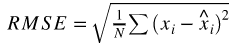

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.287084793844765
Item-based CF RMSE: 3.5174972425829765


Model-based Collaborative Filtering
Model-based Collaborative Filtering основана на разложении матрицы. В данной работе используется метод разложения, который называется singular value decomposition (SVD, cингулярное разложение). Смысл этого разложения в том, что исходную матрицу X мы разбиваем на произведение ортогональных матриц U и V^T и диагональной матрицы S.
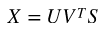
В нашем случае X – разреженная (состоящая преимущественно из нулей) user-item матрица. Разложив её на компоненты, мы можем их вновь перемножить и получить "восстановленную" матрицу X'. Матрица X' и будет являться нашим предсказанием – метод SVD сделал сам за нас всё работу и заполнил пропуски в исходной матрице X.
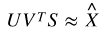

In [20]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

# делаем SVD
u, s, vt = svds(train_data_matrix, k=10)
s_diag_matrix = np.diag(s)

# предсказываем
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

# выводим метрику
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.9645850814383046
